In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df1 = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]})
df2 = pd.DataFrame({'A': [9, 10, 11, 12], 'B': [13, 14, 15, 16]})

print('Vertical: ')
concat_vertical = pd.concat([df1, df2])
print(concat_vertical.reset_index(drop=True)) #reset_index face indexele in ordine, daca concatinezi 2 df, va fi 0,1,2,3,0,1,2,3; Dar cu aceasta functie va fi 0,1,2,3,4,5,6,7; Iar drop=True elimina coloana cu Index care se creaza in timp ce ruleaza functia data

print('\nHorizontal: ')
concat_horizontal = pd.concat([df1, df2], axis=1)
print(concat_horizontal)

Vertical: 
    A   B
0   1   5
1   2   6
2   3   7
3   4   8
4   9  13
5  10  14
6  11  15
7  12  16

Horizontal: 
   A  B   A   B
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16


In [3]:
concat_horizontal['A']

,A,A
0,1,9
1,2,10
2,3,11
3,4,12


In [4]:
df1 = pd.DataFrame({
    'conectare': ['K0', 'K1', 'K2', 'K3'],
    'd': ['D1', 'D2', 'D3', 'D4']
})

df2 = pd.DataFrame({
    'conectare': ['K1', 'K2', 'K3', 'K4'],
    'b': ['B1', 'B2', 'B3', 'B4']
})

print(df1)
print(df2)

  conectare   d
0        K0  D1
1        K1  D2
2        K2  D3
3        K3  D4
  conectare   b
0        K1  B1
1        K2  B2
2        K3  B3
3        K4  B4


Pentru a concatina 2 DataFrame dar in dependenta de datele care sunt prezente in ambele dataframe-uri in coloana cheie(on) folosim functia **pd.merge()**
1. inner join &larr; Uneste DataFrame-urile in asa mod ca in DataFrame nou sa fie doar randurile care sunt comune in ambele DataFrame-uri in coloana cheie
2. outer join &larr; Uneste DataFrame-urile in asa mod ca in DataFrame nou sa fie toate randurile din ambele DataFrame-uri, dar acolo unde alte coloane pentru coloana cheie nu are careva valoare, sa fie NaN
3. left join &larr; Uneste DataFrame-urile in asa mod ca in DataFrame nou sa fie toate datele din DataFrame-ul al doilea(dreapta) din parametrele functiei, dar datele din primul, acolo unde nu sunt sa se inlocuiasca cu NaN
4. right join &larr; Uneste DataFrame-urile in asa mod ca in DataFrame nou sa fie toate datele din primul(stanga) DataFrame din parametrele functiei, dar datele din al 2-a, acolo unde nu sunt sa se inlocuiasca cu NaN

In [5]:
result_inner = pd.merge(df1, df2, on='conectare', how='inner')
print(result_inner)

result_outer = pd.merge(df1, df2, on='conectare', how='outer')
print(result_outer)

result_left = pd.merge(df1, df2, on='conectare', how='left')
print(result_left)

result_right = pd.merge(df1, df2, on='conectare', how='right')
print(result_right)

  conectare   d   b
0        K1  D2  B1
1        K2  D3  B2
2        K3  D4  B3
  conectare    d    b
0        K0   D1  NaN
1        K1   D2   B1
2        K2   D3   B2
3        K3   D4   B3
4        K4  NaN   B4
  conectare   d    b
0        K0  D1  NaN
1        K1  D2   B1
2        K2  D3   B2
3        K3  D4   B3
  conectare    d   b
0        K1   D2  B1
1        K2   D3  B2
2        K3   D4  B3
3        K4  NaN  B4


In [6]:
df1 = pd.DataFrame({
    'column1': ['K0', 'K1', 'K2', 'K3']
}, index=['B0', 'B1', 'B5', 'B4'])

df2 = pd.DataFrame({
    'column2': ['K1', 'K2', 'K3', 'K4']
}, index=['B1', 'B2', 'B3', 'B4'])

print(df1)
print(df2)

   column1
B0      K0
B1      K1
B5      K2
B4      K3
   column2
B1      K1
B2      K2
B3      K3
B4      K4


Pentru a concatena cum si functia **pd.merge()** dar nu dupa coloana cheie, dar dupa index-urile in DataFrame, folosim functia **pd.join**

In [7]:
result_join = df1.join(df2, how='outer')
result_join

,column1,column2
B0,K0,NaN
B1,K1,K1
B2,NaN,K2
B3,NaN,K3
B4,K3,K4
B5,K2,NaN


**DataFrame.groupby()** &larr; Grumeaza dupa coloana cheie toate cele lalte coloane, dupa care putem efectua diferite operatii cu ele

In [8]:
df1 = pd.DataFrame({'keys': ['el', 'ea', 'el', 'el'], 'values': [5, 6, 7, 8], 'money': [2, 6, 7, 8]})

grouping = df1.groupby('keys')
print(grouping.sum())
print(grouping.agg(['sum', 'mean']))

      values  money
keys               
ea         6      6
el        20     17
     values           money          
        sum      mean   sum      mean
keys                                 
ea        6  6.000000     6  6.000000
el       20  6.666667    17  5.666667


In [9]:
pd.DataFrame({
    'values': [df1[df1['keys'] == 'ea']['values'].sum(), df1[df1['keys'] == 'el']['values'].sum()],
    'money': [df1[df1['keys'] == 'ea']['money'].sum(), df1[df1['keys'] == 'el']['money'].sum()]
}, index=['ea', 'el'])

,values,money
ea,6,6
el,20,17


In [10]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'foo', 'bar'],
    'B': ['small', 'large', 'small', 'large', 'large'],
    'C': ['two', 'one', 'two', 'one', 'two'],
    'D': [1, 2, 3, 4, 5]
})

print(df)


     A      B    C  D
0  foo  small  two  1
1  bar  large  one  2
2  foo  small  two  3
3  foo  large  one  4
4  bar  large  two  5


**pivot_table** &larr; Restructureaza tabelul in DataFrame dupa criterile indicate in atributurile functiei

In [11]:
print(df.pivot_table(values='D', index=['A', 'C'],  columns=['B'], aggfunc='sum'))

B        large  small
A   C                
bar one    2.0    NaN
    two    5.0    NaN
foo one    4.0    NaN
    two    NaN    4.0


In [12]:
df_cars = pd.DataFrame({
    'Car wheels': [3, 4, 4, 3, 3, 4, 6],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male'],
    'Permis': [True, True, False, False, True, False, False]
})

df_cars

,Car wheels,Gender,Permis
0,3,Male,True
1,4,Male,True
2,4,Female,False
3,3,Female,False
4,3,Female,True
5,4,Female,False
6,6,Male,False


In [13]:
result = pd.crosstab(df_cars['Car wheels'], [df_cars['Gender'], df_cars['Permis']])
result

Gender     Female        Male      
Permis      False True  False True 
Car wheels                         
3               1     1     0     1
4               2     0     0     1
6               0     0     1     0

In [75]:
note = pd.DataFrame({
    'Student': ['Valera', 'Dorin', 'Sasha'],
    'Mate': [10, 8, 9],
    'Informatica': [11, 6, 4]
})

print(note)

  Student  Mate  Informatica
0  Valera    10           11
1   Dorin     8            6
2   Sasha     9            4


In [76]:
print(pd.melt(note, id_vars=['Student'], value_vars=['Mate', 'Informatica'], var_name='Subiect', value_name='Note'))

  Student      Subiect  Note
0  Valera         Mate    10
1   Dorin         Mate     8
2   Sasha         Mate     9
3  Valera  Informatica    11
4   Dorin  Informatica     6
5   Sasha  Informatica     4


In [77]:
time = pd.DataFrame({
    'date': ['2023-11-11', '2000-01-12', '1997-02-02', '2023-10-11', '2020-01-12', '1907-01-12'],
    'value': [1, 2, 3, 4, 5, 6]
})

print(time)
print(time.info())

         date  value
0  2023-11-11      1
1  2000-01-12      2
2  1997-02-02      3
3  2023-10-11      4
4  2020-01-12      5
5  1907-01-12      6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6 non-null      object
 1   value   6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None


In [78]:
time['date'] = pd.to_datetime(time['date'])

print(time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6 non-null      datetime64[ns]
 1   value   6 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 224.0 bytes
None


Timpul de date **datetime** pot fi comparate intre ele

In [79]:
print(time['date'].iloc[0])
print(time['date'].iloc[1])
print(time['date'].iloc[0]>=time['date'].iloc[1])
print(time['date'].iloc[0]-time['date'].iloc[1])

2023-11-11 00:00:00
2000-01-12 00:00:00
True
8704 days 00:00:00


In [80]:
time.set_index('date', inplace=True, drop=True)


In [81]:
print(time)
print(time.loc['2000-01-12':])

            value
date             
2023-11-11      1
2000-01-12      2
1997-02-02      3
2023-10-11      4
2020-01-12      5
1907-01-12      6
            value
date             
2023-11-11      1
2000-01-12      2
2023-10-11      4
2020-01-12      5


In [82]:
time.rolling(window=3).sum()

,value
date,
2023-11-11,NaN
2000-01-12,NaN
1997-02-02,6.0
2023-10-11,9.0
2020-01-12,12.0
1907-01-12,15.0


In [83]:
time.resample('1ME').sum()

,value
date,
1907-01-31,6
1907-02-28,0
1907-03-31,0
1907-04-30,0
1907-05-31,0
...,...
2023-07-31,0
2023-08-31,0
2023-09-30,0


<Axes: >

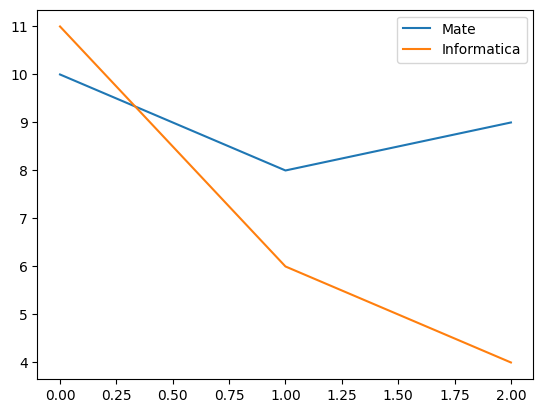

In [86]:
note = pd.DataFrame({
    'Student': ['Valera', 'Dorin', 'Sasha'],
    'Mate': [10, 8, 9],
    'Informatica': [11, 6, 4]
})

note.plot()

<Axes: >

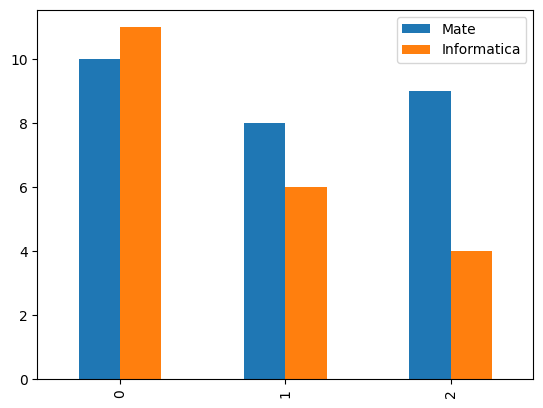

In [87]:
note.plot(kind='bar')

<Axes: xlabel='Mate', ylabel='Informatica'>

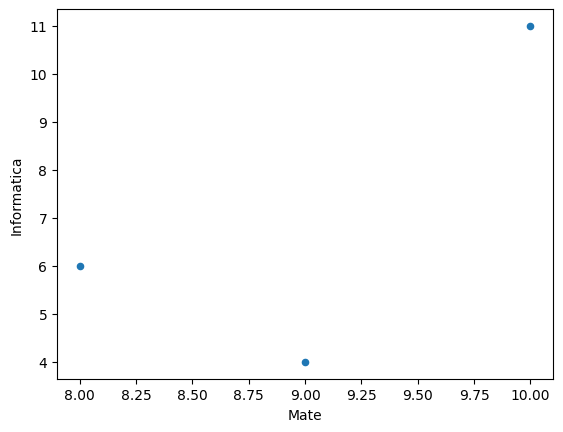

In [88]:
note.plot(kind='scatter', x='Mate', y='Informatica')